
Import the dependencies


In [32]:
#libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
#load the used dataset
data_frame = pd.read_csv('data_set.csv')


In [34]:
# display (rows,columns)
data_frame.shape

(2000, 15)

In [35]:
# show dataset info
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Patient_Number                 2000 non-null   int64  
 1   Blood_Pressure_Abnormality     2000 non-null   int64  
 2   Level_of_Hemoglobin            2000 non-null   float64
 3   Genetic_Pedigree_Coefficient   1908 non-null   float64
 4   Age                            2000 non-null   int64  
 5   BMI                            2000 non-null   int64  
 6   Sex                            2000 non-null   int64  
 7   Pregnancy                      442 non-null    float64
 8   Smoking                        2000 non-null   int64  
 9   Physical_activity              2000 non-null   int64  
 10  salt_content_in_the_diet       2000 non-null   int64  
 11  alcohol_consumption_per_day    1758 non-null   float64
 12  Level_of_Stress                2000 non-null   i

Drop the unnecessary columns and rows

In [36]:
#drop the unneeded columns
#we will remove the 'Patient_Number' column 
#we will remove the 'pregnancy' column bec. it consist of 1558 nulls and its not that important
#but we wont remove 'Genetic_Pedigree_Coefficient' and 'alcohol_consumption_per_day' columns bec. they are a main factor in the blood pressure disease
data_frame = data_frame.drop(['Patient_Number', 'Pregnancy'], axis=1 )
data_frame.shape

(2000, 13)

In [37]:
data_frame.isna().sum()

Blood_Pressure_Abnormality         0
Level_of_Hemoglobin                0
Genetic_Pedigree_Coefficient      92
Age                                0
BMI                                0
Sex                                0
Smoking                            0
Physical_activity                  0
salt_content_in_the_diet           0
alcohol_consumption_per_day      242
Level_of_Stress                    0
Chronic_kidney_disease             0
Adrenal_and_thyroid_disorders      0
dtype: int64

In [38]:
#Drop the rows that contain null values
data_frame = data_frame.dropna()
data_frame.shape

(1677, 13)

In [39]:
data_frame.isnull().sum()

Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

outliers detection

In [40]:
#investigating the datatypes of the columns content 
data_frame.dtypes


Blood_Pressure_Abnormality         int64
Level_of_Hemoglobin              float64
Genetic_Pedigree_Coefficient     float64
Age                                int64
BMI                                int64
Sex                                int64
Smoking                            int64
Physical_activity                  int64
salt_content_in_the_diet           int64
alcohol_consumption_per_day      float64
Level_of_Stress                    int64
Chronic_kidney_disease             int64
Adrenal_and_thyroid_disorders      int64
dtype: object

In [41]:
data_frame.describe()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,0.485987,11.622779,0.492940,50.040549,30.102564,0.502087,0.511628,25211.419201,24620.016696,249.852713,2.018485,0.496720,0.438879
std,0.499953,2.132422,0.290538,15.102696,11.837613,0.500145,0.500014,14002.954764,14240.819212,143.140643,0.825614,0.500138,0.496398
min,0.000000,8.100000,0.000000,25.000000,10.000000,0.000000,0.000000,628.000000,22.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,10.110000,0.240000,37.000000,20.000000,0.000000,0.000000,13644.000000,12228.000000,126.000000,1.000000,0.000000,0.000000
50%,0.000000,11.270000,0.490000,50.000000,30.000000,1.000000,1.000000,25119.000000,24816.000000,250.000000,2.000000,0.000000,0.000000
75%,1.000000,12.780000,0.740000,64.000000,40.000000,1.000000,1.000000,37448.000000,36707.000000,375.000000,3.000000,1.000000,1.000000
max,1.000000,17.560000,1.000000,75.000000,50.000000,1.000000,1.000000,49940.000000,49976.000000,499.000000,3.000000,1.000000,1.000000


In [44]:
# The dataset contain no outliers as the mean is in between the min and max values of the columns 
# Remove outliers
# df = df[(df['column1'] > 0) & (df['column1'] < 100)]

NameError: name 'df' is not defined

Feature(input) scaling
Data normalization

In [45]:
# Since the range of values of raw data varies widely
# Normalize the range of independent variables or features of data 
# feature scaling can be done by Standardization or normalization

# dataset before feature scaling:
data_frame.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1,0,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0
6,1,11.69,0.75,43,41,1,0,38369,32967,206.0,3,1,1


In [46]:
data_input = data_frame.drop(columns=['Blood_Pressure_Abnormality'])
data_output = data_frame['Blood_Pressure_Abnormality']

In [47]:
#from sklearn.model_selection import train_test_split

X , X_test , y , y_test =train_test_split(
    data_input , data_output , test_size=0.33 , random_state=0
)

X_train ,X_val ,y_train , y_val =train_test_split (
    data_input ,data_output ,test_size=0.33 ,random_state=0 
)

In [48]:
print(X_train.shape)
print(y_train.shape)
print('---------------')
print(X_val.shape)
print(y_val.shape)
print('---------------')
print(X_test.shape)
print(y_test.shape)
print('---------------')

#(no. of samples , no. of inputs )
#(no. of samples , no. of outputs )

(1123, 12)
(1123,)
---------------
(554, 12)
(554,)
---------------
(554, 12)
(554,)
---------------


In [49]:
# Standardization --> StandardScaler
# from sklearn.preprocessing import  StandardScaler


# Normalization  --> MinMaxScaler
# from sklearn.preprocessing import  MinMaxScaler

# we will use Standardization 

scaler=StandardScaler()
#scaler=MinMaxScaler()   
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [50]:

X_train_scaled[:5]

array([[-1.07567165, -0.18246682, -0.93446662, -0.92880843,  0.9884901 ,
        -1.04649379, -0.03694161,  0.94145242,  1.15780016, -1.21325782,
        -0.95898807, -0.87505615],
       [ 2.44226036, -1.3381732 ,  1.6338945 ,  0.83594256, -1.01164392,
         0.95557184,  0.71186501, -1.61949362,  0.49353017, -0.00323248,
         1.04276584, -0.87505615],
       [ 0.03771641,  0.23779004,  0.84362954,  0.24769223,  0.9884901 ,
         0.95557184,  1.59037601,  0.36504688,  0.66313101,  1.20679286,
         1.04276584, -0.87505615],
       [ 2.08204658,  0.48293988, -0.14420166, -0.08845082,  0.9884901 ,
         0.95557184, -0.07681211,  0.12230888,  1.08713314,  1.20679286,
        -0.95898807,  1.14278381],
       [-0.32717547, -1.26813039,  0.18507541,  0.7519068 ,  0.9884901 ,
         0.95557184, -1.12468326,  1.54868632, -1.03287748, -1.21325782,
        -0.95898807,  1.14278381]])

In [51]:
# its not necessary to covert X_train_scaled(which is a numpy array) to a data frame but to make it more organized 
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_val_scaled=pd.DataFrame(X_val_scaled,columns=X_val.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [52]:
X_train_scaled.head()
data_frame

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1,0,9.75,0.23,54,33,1,0,26106,25333,205.0,3,0,0
2,1,10.79,0.91,70,49,0,0,9995,29465,67.0,2,1,0
3,0,11.00,0.43,71,50,0,0,10635,7439,242.0,1,1,0
4,1,14.17,0.83,52,19,0,0,15619,49644,397.0,2,0,0
6,1,11.69,0.75,43,41,1,0,38369,32967,206.0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,0,9.69,1.00,73,42,1,1,43344,36230,48.0,3,0,1
1994,0,11.07,0.66,58,31,1,0,38603,22836,379.0,2,0,0
1995,1,10.14,0.02,69,26,1,1,26118,47568,144.0,3,1,0
1998,0,11.15,0.72,46,45,1,1,18157,15275,253.0,3,0,1


<Axes: >

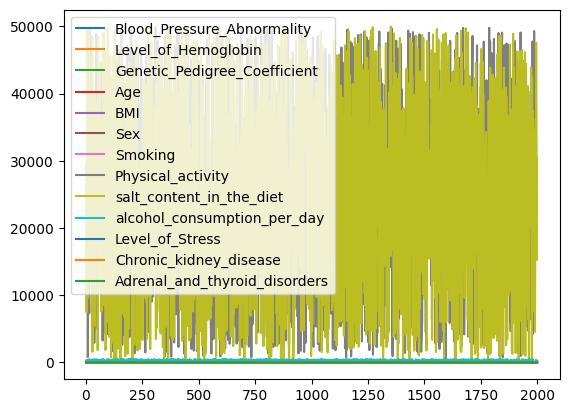

In [53]:
data_frame.plot()


In [54]:

Population_mean = data_frame.mean() #Mean of population
print("Population Mean : ", Population_mean)

Population_median = data_frame.median()
print("Population median : ", Population_median)

Population_std = data_frame.std()  #Range
print("Population standard dev : ", Population_std)

population_var = data_frame.var()
print("Population var : ", population_var)

# Inter Quartile Range of Population
population_IQR = data_frame.quantile(0.75) - data_frame.quantile(0.25)

Population Mean :  Blood_Pressure_Abnormality           0.485987
Level_of_Hemoglobin                 11.622779
Genetic_Pedigree_Coefficient         0.492940
Age                                 50.040549
BMI                                 30.102564
Sex                                  0.502087
Smoking                              0.511628
Physical_activity                25211.419201
salt_content_in_the_diet         24620.016696
alcohol_consumption_per_day        249.852713
Level_of_Stress                      2.018485
Chronic_kidney_disease               0.496720
Adrenal_and_thyroid_disorders        0.438879
dtype: float64
Population median :  Blood_Pressure_Abnormality           0.00
Level_of_Hemoglobin                 11.27
Genetic_Pedigree_Coefficient         0.49
Age                                 50.00
BMI                                 30.00
Sex                                  1.00
Smoking                              1.00
Physical_activity                25119.00
salt_conten

In [55]:
abnormalBoxPlot = data_frame[data_frame['Blood_Pressure_Abnormality']==1]

plt.boxplot(data_filtered['Age'], vert=False)


NameError: name 'data_filtered' is not defined

In [56]:
normalBoxPlot=data_frame[data_frame['Blood_Pressure_Abnormality']==0]
plt.boxplot(data_filtered['Age'],vert=False)
plt.title("BoxPlot for Ages with normal blood pressure")

NameError: name 'data_filtered' is not defined

Text(0, 0.5, 'Amount')

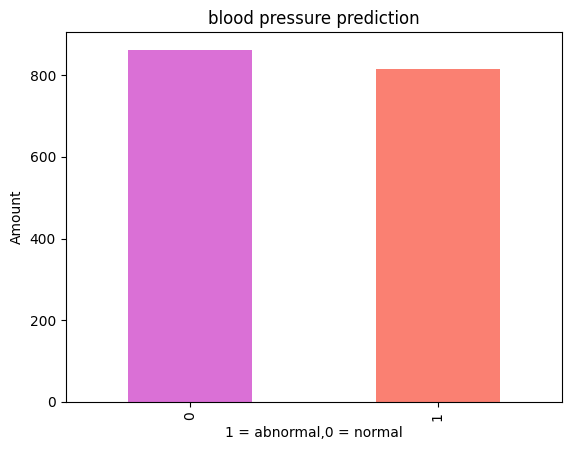

In [57]:
data_frame.Blood_Pressure_Abnormality.value_counts().plot(kind='bar',color=['orchid','salmon'])
plt.title("blood pressure prediction")
plt.xlabel("1 = abnormal,0 = normal")
plt.ylabel("Amount")

<Axes: xlabel='Blood_Pressure_Abnormality', ylabel='count'>

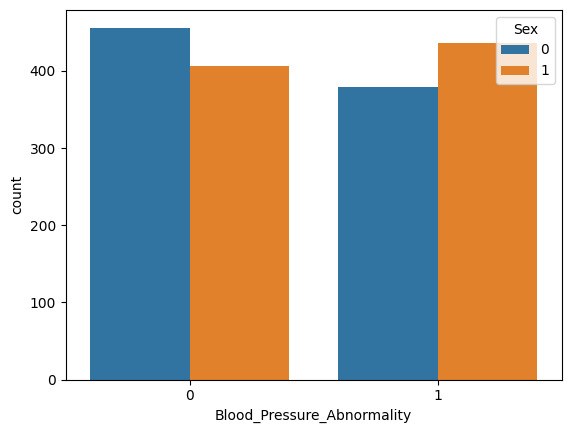

In [58]:
sns.countplot(x='Blood_Pressure_Abnormality',data=data_frame,hue='Sex')


Text(0.5, 1.0, 'Relation between Adrenal & Thyroid Disorders and Abnormal blood pressure')

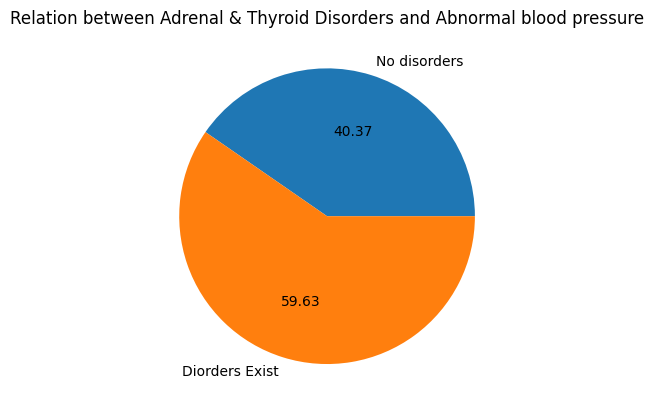

In [60]:
# smokers = data_frame[data_frame['Smoking']==1] 
abnormalPatients = data_frame[data_frame['Blood_Pressure_Abnormality']==1]
sexGroups = abnormalPatients.groupby('Adrenal_and_thyroid_disorders')
labs = 'No disorders','Diorders Exist'
sexGroups.size().plot(kind = 'pie',autopct = '%.2f',labels = labs)
plt.title("Relation between Adrenal & Thyroid Disorders and Abnormal blood pressure")



In [61]:
columnd = data_frame['Blood_Pressure_Abnormality']
normal = data_frame == 1
normal
columnd
data_frame.plot.bar(x = 'Level_of_Stress', stacked = True,title = 'dfaf ')

<Axes: title={'center': 'dfaf '}, xlabel='Level_of_Stress'>

Error in callback <function flush_figures at 0x00000222AF1D60C0> (for post_execute):


KeyboardInterrupt: 